:📌Customer Churn Analysis – Telecom Company

Customer churn is one of the most critical business challenges for subscription and telecom companies.
The goal of this analysis is to:

- identify customer segments with the highest churn risk,

- understand behavioral and service-related factors influencing churn,

- provide actionable recommendations to reduce churn and improve retention.

This project explores customer demographics, account information, service usage, and billing patterns to uncover insights that can help the business make data-driven decisions.

🎯 Problem Statement

Telecom companies experience significant revenue loss when customers discontinue their service (churn).
Understanding the drivers of churn is essential to reduce customer loss, improve satisfaction, and increase long-term profitability.

This analysis aims to answer key business questions:
1. Which customer segments are more likely to churn?
2. What services or contract types lead to higher churn?
3. Do billing behaviors such as payment method or monthly charges affect churn?
4. How does customer tenure impact churn probability?
5. What actions can the company take to retain high-risk customers?

By analyzing the churn patterns, the company can design targeted retention strategies and reduce churn more effectively.

🔍 Key Questions Explored in This Analysis

This project focuses on understanding churn by exploring the following analytical questions:

Customer Behavior

- Do new customers (low tenure) churn more than long-term customers?
- How do monthly charges influence churn likelihood?
- Does total lifetime spending relate to customer churn?

Service-Related Factors

- Which internet services (Fiber, DSL, None) experience the highest churn?
- Do customers with additional services (Tech Support, Online Backup, etc.) churn less?

Contract & Billing Insights

- Which contract type (Month-to-Month, One Year, Two Year) has the highest churn?
- How does payment method affect churn rate?
- Are paperless billing customers more likely to churn?

Demographics

- Do senior citizens churn more than younger customers?
- Does having a partner or dependents reduce churn risk?

These questions guide the exploratory analysis and shape actionable business recommendations.

In [8]:
#imoport the libraries (pandas,numpy,matplotlib etc) --1st Step--
import pandas as pd
import numpy as np

#reading the dataset file i.e - CSV file --2nd Step--
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head() # prints the first 5 entries in the dataset , we did this because to check if the csv is loaded or not 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#check the info of the dataset (rows , columns , datatypes etc) --3rd Step--
*#This one command gives you a high-level summary of the entire dataset — 
like reading the cover page of a book #*
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#checking  missing values in the dataset --4th Step-- 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#checking the Stats of the dataset(mean, mode , min/max etc) -- 5th Step--
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
# now we check unique values in a target column (right now - churn ) --6th Step--
df['Churn'].value_counts()
#THIS TELLS US THE MAIN TARGET OF OUR ANALYSIS

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
#CONVERTING total chagres table to numeric --7th Step--
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')


In [21]:
#now check the null values if any after the conversion 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
# filling the missing / NAN  values in the dataset if any after conversions
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TotalChrages        0
dtype: int64

In [36]:
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure']


In [39]:
# converting yes/no values to 1/0 for better analysis
yes_no_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in yes_no_cols:
    df[col] = df[col].replace({'Yes':1, 'No':0}).astype(int)



In [40]:
#fixing senior citizen column 
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes', 0:'No'})


In [41]:
#Identify categorical vs numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

cat_cols, num_cols


(Index(['customerID', 'gender', 'SeniorCitizen', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaymentMethod'],
       dtype='object'),
 Index(['Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalChrages'],
       dtype='object'))

In [43]:
# checking for duplicate values 
df.duplicated().sum()

np.int64(0)

In [44]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              Exploratory Data Analysis (EDA)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

                           1.1 Understanding the Target Variable

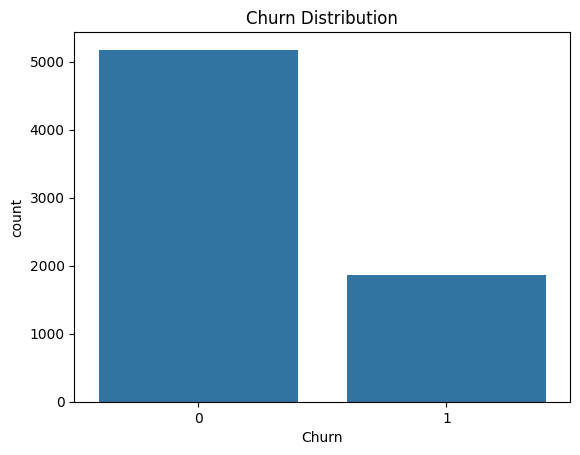

In [47]:
# churn distribution 
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


                                      1.2 Numerical Features vs Churn

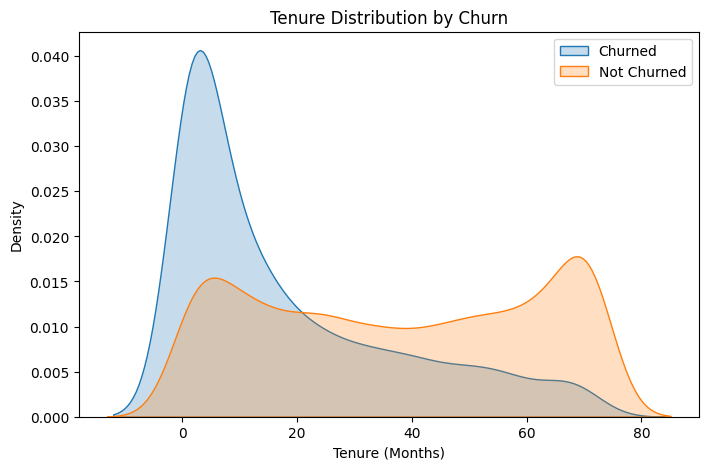

In [48]:
# tenure vs churn 
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==1]['tenure'], label='Churned', fill=True)
sns.kdeplot(df[df['Churn']==0]['tenure'], label='Not Churned', fill=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.legend()
plt.show()


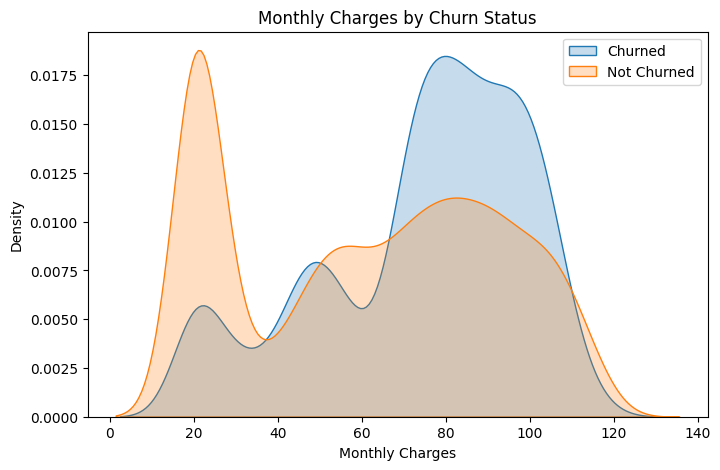

In [49]:
#monthly charges vs churn 
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churned', fill=True)
sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Not Churned', fill=True)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()


                                1.3 Categorical Features vs Churn

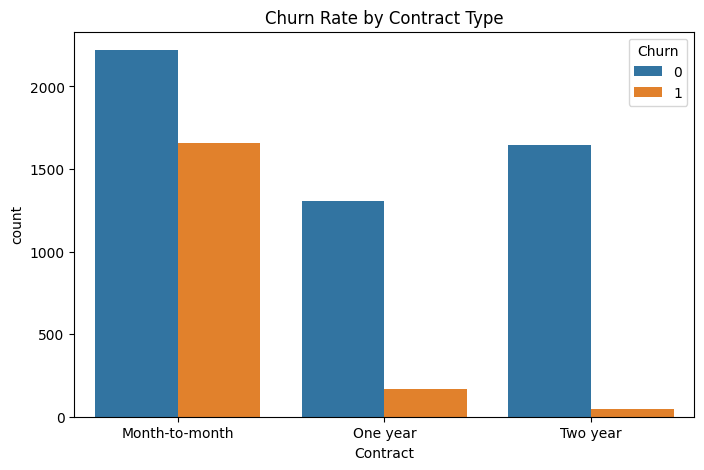

In [50]:
# churn by contract type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()


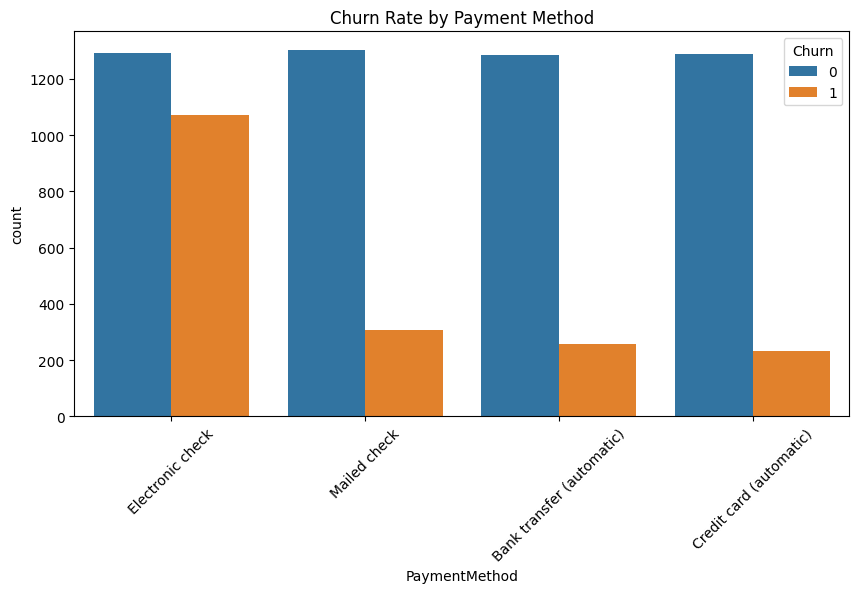

In [51]:
#chunr by payment mehtod
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()


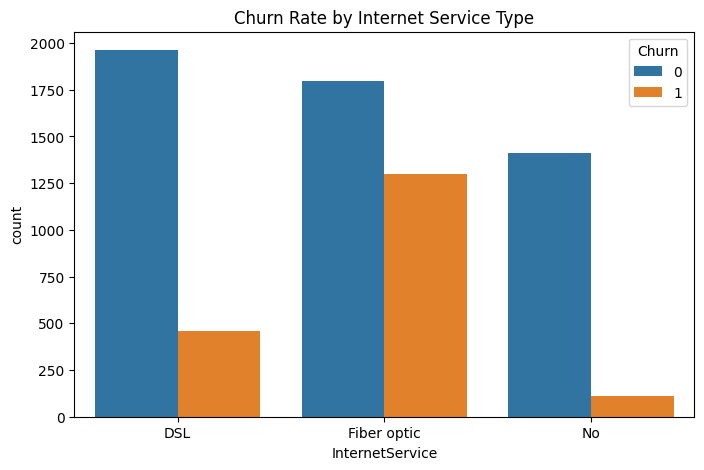

In [52]:
# churn by internet service type 
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.show()


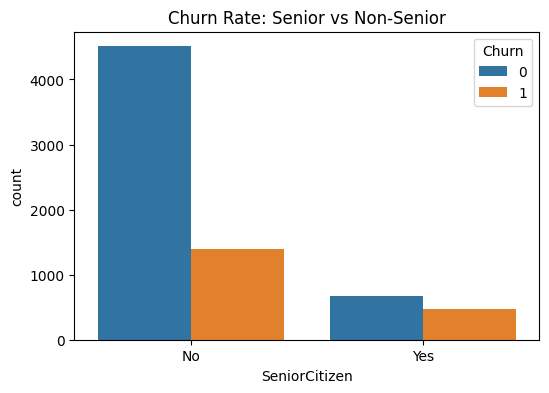

In [53]:
# churn by senior citizen status 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn Rate: Senior vs Non-Senior')
plt.show()


🔥 5. Key Insights from Customer Churn Analysis
1. Contract Type is the strongest driver of churn

- Customers on Month-to-Month contracts churn far more than those on 1-year or 2-year contracts.
- Longer contract customers show much higher retention.

2. High Monthly Charges lead to higher churn

- Churn is concentrated among customers paying high monthly bills.
- Indicates dissatisfaction with pricing or limited value for cost.

3. Fiber Optic Internet Service customers churn the most

- Fiber users churn more than DSL users.
- Suggests performance or pricing concerns with fiber service.

4. Customers using Electronic Check payment method churn more

- Highest churn rate among all payment types.
- Likely due to higher fees, complexity, or lack of auto-pay features.

5. New customers (low tenure) are the most at risk

- Tenure distribution shows high churn in the first few months.
- Retention efforts should focus on early-stage customers.

6. Senior citizens show slightly higher churn

- But this factor is weaker compared to contract type and billing behavior.

7. TotalCharges and tenure are highly correlated

- Long-term customers naturally have higher total spend and lower churn.

📌 6. Business Recommendations

Based on the analysis, the following actions can help reduce churn and improve customer retention:

1. Encourage Month-to-Month customers to switch to longer contracts

- Offer discounts or loyalty benefits for upgrading to 1-year or 2-year plans.
- Month-to-month customers are the highest churn risk segment.

2. Review pricing strategy for high-monthly-charge customers

- Introduce flexible, value-based pricing for heavy users.
- Provide personalized offers or bundle discounts.

3. Improve experience for Fiber Optic customers

- Highest churn found among fiber customers → investigate:
- service quality issues

speed reliability

- customer support
- Implement priority technical support for fiber subscribers.

4. Simplify or promote alternatives to Electronic Check payments

- Customers using Electronic Check churn the most.
- Promote automatic payments via:
      - Credit/Debit Card
      - Bank Transfer
-Offer incentives for switching payment method.

5. Strengthen onboarding for new customers

- Churn is highest in the first few months.
- Provide guided onboarding:
     - welcome calls
     - plan explanations
     - early support touchpoints

6. Targeted retention for Senior Citizens
   
- Provide easier-to-understand plans
- Offer senior discounts or simplified billing
